# Python for Analytics
__Name__: Jide Afolabi<br>
__Date__: March 3, 2024 <br />
__Project__: Python <br />
__Purpose__: Using NumPy to vectorize a Monte Carlo simulation approach to estimate the value of π.


### Objective
To write Python code to accomplish the creation of π by creating a new estimate using [Monte Carlo simulation](https://www.ibm.com/topics/monte-carlo-simulation). 

This technique relies on simulation and random numbers to estimate the value of π essentially by throwing darts at a board inscribed with a circle and counting how many darts land inside the circle and how many land outside the circle. I will stick to a computer-based simulation. To simplify, I will use the first quadrant unit square as suggested in the article.

Successfull darts inside the cirle: 785426
Estimate of Pi: 3.141704


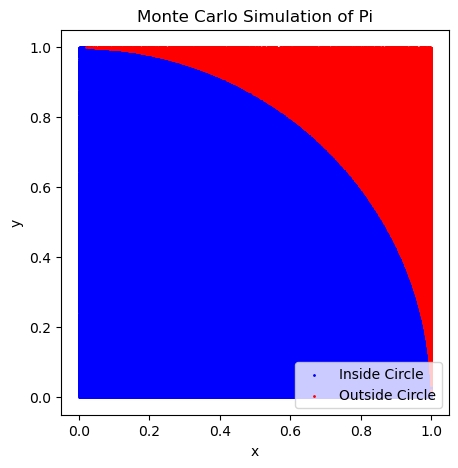

In [4]:
# Import numpy and matplotlib library
import numpy as np
import matplotlib.pyplot as plt

# Generate random uniform numbers for the coordinates
size = 1_000_000
rng = np.random.default_rng(seed=12345)
random_coord = rng.uniform(0,1,size=(1_000_000,2))

# Calculate the square of each coordinate column and sum them
sum_of_squares = random_coord[:, 0]**2 + random_coord[:, 1]**2

# Calculate the square root of the sum of squares to get the distance
distances = np.sqrt(sum_of_squares)

#Create a boolean array that compares distance to get the successfull dart within the circle
distances <= 1
successful_darts = (distances <= 1).sum()
print(f'Successfull darts inside the cirle: {successful_darts}')

# Calculate the estimated Pi
Est_Pi = 4 * (successful_darts/size)
print(f'Estimate of Pi: {Est_Pi}')

# Plot points within and outside the unit circle
inside_circle = random_coord[distances <= 1]
outside_circle = random_coord[distances > 1]
plt.figure(figsize=(5, 5))
plt.scatter(inside_circle[:, 0], inside_circle[:, 1], color='blue', s=1, label='Inside Circle')
plt.scatter(outside_circle[:, 0], outside_circle[:, 1], color='red', s=1, label='Outside Circle')
plt.title('Monte Carlo Simulation of Pi')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Methodology
1. For each dart thrown, I generated its coordinates, _x_ and _y_, using a random uniform distribution from 0 - 1. The NumPy `uniform` method was used to generate these random coordinates with `seed=12345`.. 
2. If the dart is inside the quarter-circle, I counted it. A dart is inside the quarter-circle if its distance from the origin (0, 0) is <= 1. 
3. I calculated the square root of the sum of squares to get the distance.
4. After all the darts have been thrown and counted, Pi was estimated.

### Summary
I used the NumPy library which makes it relatively easy to implement vectorized solutions of Monte Carlo simulations such as this. 
I then used matplotlib to create and display a plot showing each of the coordinates generated as a dot in the unit square using different colors for the points within the unit circle and the points outside the unit circle.
